<h1 align="center"> Yelp </h1>
<h2 align="center"> An Exploratory Analysis of Yelp dataset</h2>
<h3 align="center"> Author: Linrui Han, Daren Liu, Ran Liu, Zhihui Ruan, Yalin Wang (author name by Alphabet ) </h3>
<h3 align="center"> Last Update: 2/19/2020 </h3>

# 1. Introduction
### 1.1 Business Question


Yelp is a business directory service and crowd-sourced review forum. In yelp, someone rates a resturant and give a comment. Other people can check this review. What is more, some review can lead potentional customer to a certain resturant and resturant benefits from a good review. The customer rate a resturant based on their taste, their loacaion and other factors.
In this project, we need to find out some question with resturant and users. The research question are:
1. What is the relationship between climate characteristic of areas and local catering industries? 
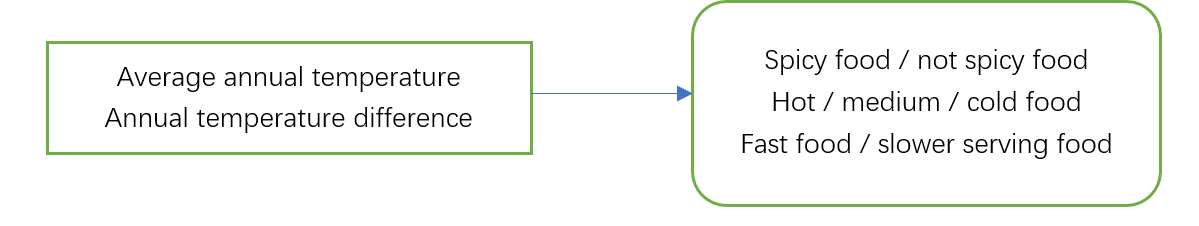
2. What factors impact on customer satisfaction?
    There are some factors that may have impact:
    
   a)Parking lot
   
   b)Food quality
   
   c)Take out service
   
   d)Single business categories / multiple business categories. 
   
   e)Business hours
   

3. What is the most important characteristic of valuable users?

    The characteristic of valuable users may contains these factors:
    
   I)Useful
   
   II)Funny comments
   
   III)Cool comments
   
   IV)Being active on accounts


### 1.2 Busniess Scenario

The business scenario contains the following comcepts:

1.	The innovative idea of founding YELP comes from the good and useful comments/reviews that can be greatly beneficial to consumers when they make decision on which choice to pick on the background of having access and obtaining information difficultly, which results in this platform showing up online created by Stoppelman.
2.	Different business scenarios can lead to totally various outcomes. This proposal will divide into several situations, including economic level; consumption level; population distribution; circumstance of restaurant(environment , decoration, theme etc); its location/place; quantity and quality of food; service performance; having parking lot or not;  consumer’s preference; consumer’s satisfaction; local culture; etc…
3.	From YELP, the consumers can easily find the restaurant that they prefer to go according to reading and browsing the previous comments to decide where to eat. However, lots of restrictions emerge in this process, the honesty and faithfulness of such comments become a concern for the consumers. How to make full use of this platform to serve people and avoid these useless information matters. 


### 1.3  High Leverl Requirement

We find some datasets from yelp and view some chain restaurants; it shows us these chain restaurants have different stars if it is in a different area. We want to know why people have different comments about the same restaurant. Does restaurant popularity depend on its location? Does the climate in different regions also a factor affecting people's choice of food? Compared with inland cities, seafood restaurants are more popular in seaside cities. Because the seaside has good geographical advantages, and the seafood is fresh and cheap. Some customer comments mention that a restaurant with a parking lot will be more convenient for them. Thus, we also want to know if a restaurant with a parking lot or some other additional service will attract customers? we just view a few data but not enough to support our hypothesis. We need to use more datasets to support our proposition.

# 2. Data Source and Collection


The dataset was downloaded from the following link:

https://www.yelp.com/dataset

This dataset has six json documents which include business.json, checkin.json, photo.json, review.json, tip.json and user.json. Combine all these documents, we have variables more than 20, and large number of observations for each documents which is absolutely over 1000.

This research focuses on the three research questions which are explained in the introduction part.
So the key information in this research we needed are as following: 

The location of the business, business's name, attributes to values like parking lot availability of the business, business categories which are available in business.json; text of the review, stars rating, date of the review, number of useful/funny/cool votes received of certian review which are available in review.json; text of the tip which is available in tip.json; number of compliments received by the user which is available in user.json; and also business_id, review_id, user_id which are the connections among these documents.

Therefore, we will only use four of the six json documents which are business.json, review.json, tip.json and user.json.


In this project, we choose to use pandas data frame to organize the dataset.
First, let's import the pandas module into the current environment.

In [1]:
import pandas as pd

As the dataset is stored in a jsonlines files, we can call the read_json() method in the pandas module to read the data into a data frame.

In [2]:
# Read data
business = pd.read_json('Dataset/business.json', lines=True)

In [3]:
review = pd.read_json('Dataset/review.json', lines=True)

In [4]:
tip = pd.read_json('Dataset/tip.json', lines=True)

In [5]:
user = pd.read_json('Dataset/user.json', lines=True)

Let's show the information of the each data frame.

In [6]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
business_id     192609 non-null object
name            192609 non-null object
address         192609 non-null object
city            192609 non-null object
state           192609 non-null object
postal_code     192609 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [7]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
useful         int64
funny          int64
cool           int64
text           object
date           datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 459.1+ MB


In [8]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223094 entries, 0 to 1223093
Data columns (total 5 columns):
user_id             1223094 non-null object
business_id         1223094 non-null object
text                1223094 non-null object
date                1223094 non-null datetime64[ns]
compliment_count    1223094 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.7+ MB


In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637138 entries, 0 to 1637137
Data columns (total 22 columns):
user_id               1637138 non-null object
name                  1637138 non-null object
review_count          1637138 non-null int64
yelping_since         1637138 non-null object
useful                1637138 non-null int64
funny                 1637138 non-null int64
cool                  1637138 non-null int64
elite                 1637138 non-null object
friends               1637138 non-null object
fans                  1637138 non-null int64
average_stars         1637138 non-null float64
compliment_hot        1637138 non-null int64
compliment_more       1637138 non-null int64
compliment_profile    1637138 non-null int64
compliment_cute       1637138 non-null int64
compliment_list       1637138 non-null int64
compliment_note       1637138 non-null int64
compliment_plain      1637138 non-null int64
compliment_cool       1637138 non-null int64
compliment_funny      163

Let's show the sample of each dataset. To show the complete structure, we can simply show two transposed rows (in this case, the 1st two observations).

In [10]:
business.head(2).transpose()

,0,1
business_id,1SWheh84yJXfytovILXOAQ,QXAEGFB4oINsVuTFxEYKFQ
name,Arizona Biltmore Golf Club,Emerald Chinese Restaurant
address,2818 E Camino Acequia Drive,30 Eglinton Avenue W
city,Phoenix,Mississauga
state,AZ,ON
postal_code,85016,L5R 3E7
latitude,33.5221,43.6055
longitude,-112.018,-79.6523
stars,3,2.5
review_count,5,128


In [11]:
review.head(2).transpose()

,0,1
review_id,Q1sbwvVQXV2734tPgoKj4Q,GJXCdrto3ASJOqKeVWPi6Q
user_id,hG7b0MtEbXx5QzbzE6C_VA,yXQM5uF2jS6es16SJzNHfg
business_id,ujmEBvifdJM6h6RLv4wQIg,NZnhc2sEQy3RmzKTZnqtwQ
stars,1,5
useful,6,0
funny,1,0
cool,0,0
text,Total bill for this horrible service? Over $8G...,I *adore* Travis at the Hard Rock's new Kelly ...
date,2013-05-07 04:34:36,2017-01-14 21:30:33


In [12]:
tip.head(2).transpose()

,0,1
user_id,UPw5DWs_b-e2JRBS-t37Ag,Ocha4kZBHb4JK0lOWvE0sg
business_id,VaKXUpmWTTWDKbpJ3aQdMw,OPiPeoJiv92rENwbq76orA
text,"Great for watching games, ufc, and whatever el...",Happy Hour 2-4 daily with 1/2 price drinks and...
date,2014-03-27 03:51:24,2013-05-25 06:00:56
compliment_count,0,0


In [13]:
user.head(2).transpose()

,0,1
user_id,l6BmjZMeQD3rDxWUbiAiow,4XChL029mKr5hydo79Ljxg
name,Rashmi,Jenna
review_count,95,33
yelping_since,2013-10-08 23:11:33,2013-02-21 22:29:06
useful,84,48
funny,17,22
cool,25,16
elite,"2015,2016,2017",
friends,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...","kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg..."
fans,5,4


As shown above, the business data frame contains 192609 observations (rows) and 14 variables (columns); the review data frame contains 6685900 observations(rows) and 9 variables (columns); the tip data frame contains 1223094 observations (rows) and 5 variables (columns); the user data frame contains 1637138 observations (rows) and 22 variables (columns)

Next, we check the missing values for each dataframe. Let's use the apply() method to apply an anonymous lambda function along input axis of DataFrame to get the number of missing values for each variable in each dataframe.

In [14]:
business.apply(lambda x: sum(x.isnull()), axis=0)

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      28836
categories        482
hours           44830
dtype: int64

In [15]:
review.apply(lambda x: sum(x.isnull()), axis=0)

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [16]:
tip.apply(lambda x: sum(x.isnull()), axis=0)

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [17]:
user.apply(lambda x: sum(x.isnull()), axis=0)

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

The meaning of each variables are available on yelp dataset website:

https://www.yelp.com/dataset/documentation/main

business
- **business_id**: 22 character unique string business id
- **name**: the business's name
- **address**: the full address of the business
- **city**: the city
- **state**: 2 character state code, if applicable
- **postal code**: the post code
- **latitude**: latitude
- **longitude**: longitude
- **stars**: star rating, rounded to half-stars
- **review_count**: number of reviews
- **is_open**: 0 or 1 for closed or open, respectively
- **attributes**: business attributes to values
- **categories**: business categories
- **hours**: value hours, hours are using a 24hr clock


reviw

- **review_id**: 22 character unique review id
- **user_id**: 22 character unique user id, maps to the user in user.json
- **business_id**: 22 character unique user id, maps to business in business.json
- **stars**: star rating
- **date**: date formatted YYYY-MM-DD
- **text**: the review itself
- **review_id**: 22 character unique review id
- **useful**: number of useful votes received
- **funny**: number of funny votes received
- **cool**: number of cool votes received

tip

- **date**: when the tip was written, formatted like YYYY-MM-DD
- **compliment_count**: how many compliments it has
- **business_id**: 22 character business id, maps to business in business.json
- **user_id**: 22 character unique user id, maps to the user in user.json


user

- **user_id**: 22 character unique user id
- **name**: the user's first name
- **review_count**: the number of reviews they've written
- **yelping_since**: when the user joined Yelp, formatted like YYYY-MM-DD
- **useful**: number of useful votes sent by the user
- **funny**: number of funny votes sent by the user
- **cool**: number of cool votes sent by the user
- **elite**: the years the user was elite
- **friends**: an array of the user's friend as user_ids
- **fans**: number of fans the user has
- **average_stars**: average rating of all reviews
- **compliment_hot**: number of hot compliments received by the user
- **compliment_more**: number of more compliments received by the user
- **compliment_profile**: number of profile compliments received by the user
- **compliment_cute**: number of cute compliments received by the user
- **compliment_list**: number of list compliments received by the user
- **compliment_note**: number of note compliments received by the user
- **compliment_plain**: number of plain compliments received by the user
- **compliment_cool**: number of cool compliments received by the user
- **compliment_funny**: number of funny compliments received by the user
- **compliment_writer**: number of writer compliments received by the user
- **compliment_photos**: number of photo compliments received by the user
